# ICP09-CNN

# Tutorial 1 - CNN Classification - Keras - Working with image files

We will predict the category of a fruit image.

In [1]:
import numpy as np
import tensorflow.keras as keras

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt

np.random.seed(1)  # for reproducibility


# Image Readers

In [3]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2) # rescale 1./255 to normalize pixel values

training_generator = image_generator.\
    flow_from_directory('ImageData/FRUITS/Apples',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    color_mode='rgb',
    subset="training")

validation_generator = image_generator.\
    flow_from_directory('ImageData/FRUITS/Apples',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    color_mode='rgb',
    subset="validation")

Found 3879 images belonging to 10 classes.
Found 965 images belonging to 10 classes.


Let's explore the image files. ImageDataGenerator contains batches whose size was set in the batch_size parameter, let's display the first batch

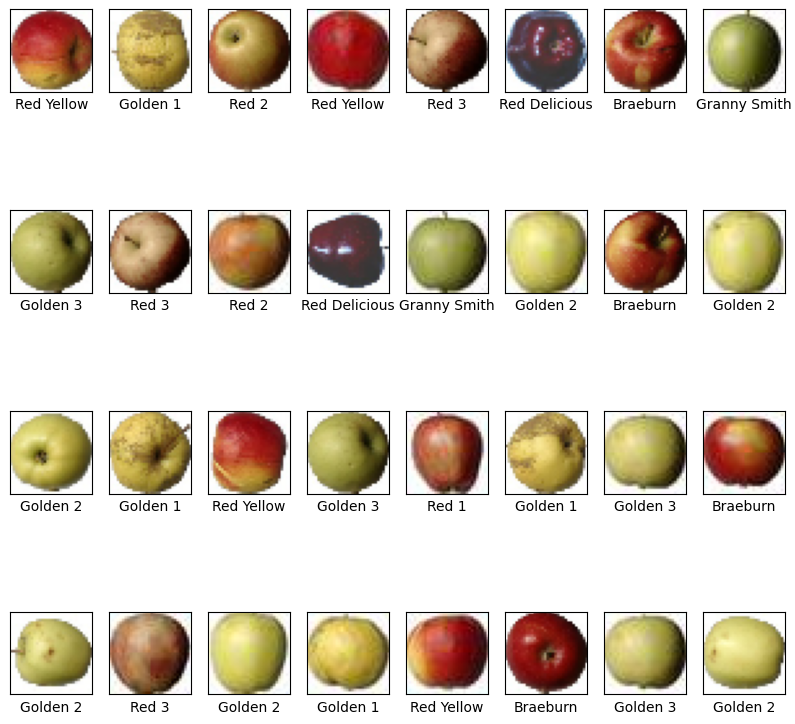

In [4]:
# get all the classes of apples found in the data
apple_name_index = training_generator.class_indices

# get all the classes of apples found in the data
training_labels = list(training_generator.class_indices.keys())

# get the first batch of images and associated labels
images, labels = training_generator[0]

# get the size of the batch
batch_size = len(images)

# do some calculations to accomodate the number of images (which is determined by the batch size)
cols = 8
rows = batch_size//cols

# display the images
plt.figure(figsize=(10,10))
for i in range(batch_size):
    plt.subplot(rows,cols,i+1)
# if you prefer to see images without the grid and axes labels, uncomment the following 3 lines
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    plt.xlabel(training_labels[int(np.argmax(labels[i]))])
plt.show()

## NOTE: This section simply breaksdown some of the code above to show what is happening... this should be removed in production

In [5]:
# get all the classes of apples found in the data
apple_name_index = training_generator.class_indices
print(apple_name_index)

{'Braeburn': 0, 'Golden 1': 1, 'Golden 2': 2, 'Golden 3': 3, 'Granny Smith': 4, 'Red 1': 5, 'Red 2': 6, 'Red 3': 7, 'Red Delicious': 8, 'Red Yellow': 9}


In [6]:
# get all the classes of apples found in the data
training_labels = list(training_generator.class_indices.keys())
print(training_labels)

['Braeburn', 'Golden 1', 'Golden 2', 'Golden 3', 'Granny Smith', 'Red 1', 'Red 2', 'Red 3', 'Red Delicious', 'Red Yellow']


In [7]:
# get the first batch of images and associated labels
images, labels = training_generator[0]

In [8]:
print(images.shape) # we have 32 images (our batch size) of size 32x32 with 3 channels (RGB)

(32, 32, 32, 3)


In [9]:
print(labels) # we have 32 labels (our batch size) one-hot encoded with 10 classes

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

In [10]:
# this will take the index for the max value in each one-hot vector and return the class name
print(labels[1])
print(np.argmax(labels[1]))
print(training_labels[int(np.argmax(labels[1]))])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1
Golden 1


# Model

To find more about Convulutional layers, see the official documentation found here https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D

In [11]:
model = Sequential()
# Add convolutional layer. Learn 16 filters using a 3x3 kernel
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.15))

# Add convolutional layer. Learn 32 filters using a 3x3 kernel
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(rate=0.1))

# Flatten to a 1d array for feeding into our dense layer
model.add(Flatten())

# Add a dense layer with 128 neurons
model.add(Dense(128, activation='relu'))
#model.add(Dropout(rate=0.1))

# Add the final prediction later with 10 neurons, one for each class
model.add(Dense(10, activation='softmax'))

In [12]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
#train the model
history = model.fit(training_generator, validation_data=(validation_generator), epochs=100)

Epoch 1/100
122/122 [==============================] - 26s 191ms/step - loss: 0.7028 - accuracy: 0.7695 - val_loss: 1.1966 - val_accuracy: 0.7057
Epoch 2/100
122/122 [==============================] - 18s 149ms/step - loss: 0.0657 - accuracy: 0.9825 - val_loss: 1.1973 - val_accuracy: 0.7793
Epoch 3/100
122/122 [==============================] - 18s 143ms/step - loss: 0.0135 - accuracy: 0.9990 - val_loss: 0.9102 - val_accuracy: 0.8518
Epoch 4/100
122/122 [==============================] - 17s 143ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 1.0275 - val_accuracy: 0.8539
Epoch 5/100
122/122 [==============================] - 19s 151ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 1.2570 - val_accuracy: 0.8425
Epoch 6/100
122/122 [==============================] - 18s 144ms/step - loss: 0.0899 - accuracy: 0.9709 - val_loss: 0.6987 - val_accuracy: 0.8052
Epoch 7/100
122/122 [==============================] - 17s 143ms/step - loss: 0.0049 - accuracy: 0.9995 - val_loss: 1.0750 -

# Summarize the model and it's performance

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Confution Matrix and Classification Report
#Y_pred = model.predict(validation_generator, num_of_test_samples // batch_size+1)
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# y_test is the actual labels
y_test = validation_generator.classes

#target_names = species of apples (class names)
target_names = list(training_generator.class_indices.keys())

31/31 [==============================] - 3s 91ms/step


In [16]:
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

               precision    recall  f1-score   support

     Braeburn     0.5833    1.0000    0.7368        98
     Golden 1     0.5799    1.0000    0.7341        98
     Golden 2     1.0000    1.0000    1.0000        98
     Golden 3     1.0000    1.0000    1.0000        96
 Granny Smith     1.0000    1.0000    1.0000        98
        Red 1     1.0000    1.0000    1.0000        98
        Red 2     1.0000    0.2857    0.4444        98
        Red 3     1.0000    1.0000    1.0000        85
Red Delicious     1.0000    1.0000    1.0000        98
   Red Yellow     1.0000    0.2755    0.4320        98

     accuracy                         0.8539       965
    macro avg     0.9163    0.8561    0.8347       965
 weighted avg     0.9150    0.8539    0.8322       965



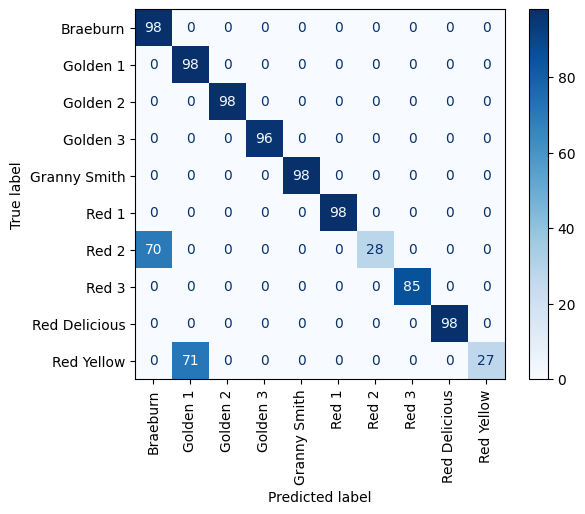

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

# display the confusion matrix
#y_test = validation_generator.classes
#y_pred = model.predict(validation_generator).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation='vertical')
plt.show()

# Predict a single image

In [18]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

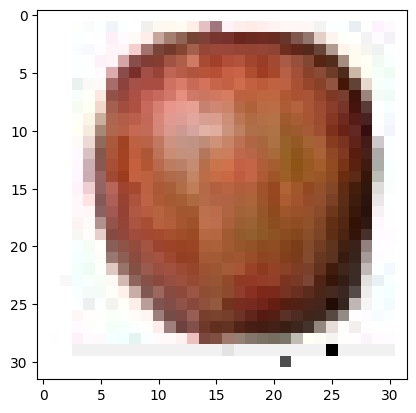

In [19]:
img = load_img(
    "ImageData/FRUITS/Test_10/Apple Red 1/3_100.jpg",
    color_mode='rgb',
    target_size=(32,32)
)

plt.imshow(img)

In [20]:
#Convert the image to array
single_image = img_to_array(img)

#divide the image values by 255 to normalize
img_rank4 = np.expand_dims(single_image/255, axis=0)

#generate preduction using our model
model.predict(img_rank4)

1/1 [==============================] - 0s 96ms/step


array([[5.5760467e-26, 2.0066545e-19, 3.0252122e-24, 1.1023115e-18,
        4.1509434e-21, 9.9999499e-01, 2.0474952e-21, 1.0723690e-12,
        5.0247882e-06, 3.3832071e-17]], dtype=float32)

In [21]:
#since the output above is difficult to read, let's round
np.round(model.predict(img_rank4),2)

1/1 [==============================] - 0s 28ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [22]:
# Now, we need to find the index where the prediction array is 1
np.argmax(model.predict(img_rank4), axis=-1)

1/1 [==============================] - 0s 25ms/step


array([5])

In [23]:
# To get the label, we need to get the class indices from the training generator
label_map = (training_generator.class_indices)
label_map

{'Braeburn': 0,
 'Golden 1': 1,
 'Golden 2': 2,
 'Golden 3': 3,
 'Granny Smith': 4,
 'Red 1': 5,
 'Red 2': 6,
 'Red 3': 7,
 'Red Delicious': 8,
 'Red Yellow': 9}

In [24]:
# Now, we can use our prediction and get the class label from the class indices:
list(label_map.keys())[np.argmax(model.predict(img_rank4), axis=-1)[0]]

1/1 [==============================] - 0s 25ms/step


'Red 1'

Outr model predicted "Red 1" which is correct!

In [25]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Loss {loss:.5f}\nAccuracy {accuracy:.5f}")

31/31 [==============================] - 3s 84ms/step - loss: 2.3127 - accuracy: 0.8539
Loss 2.31269
Accuracy 0.85389


In [ ]:
print(history.history.keys())

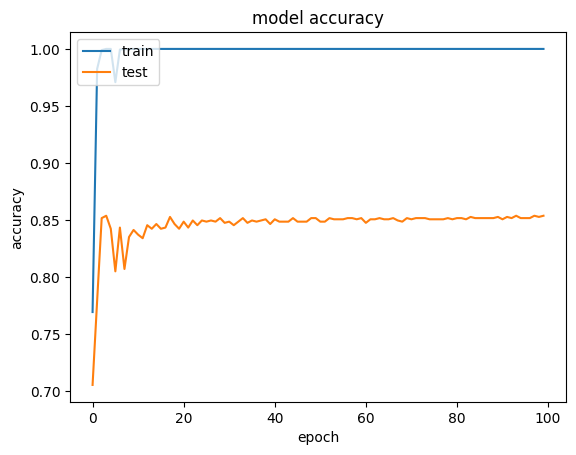

In [27]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


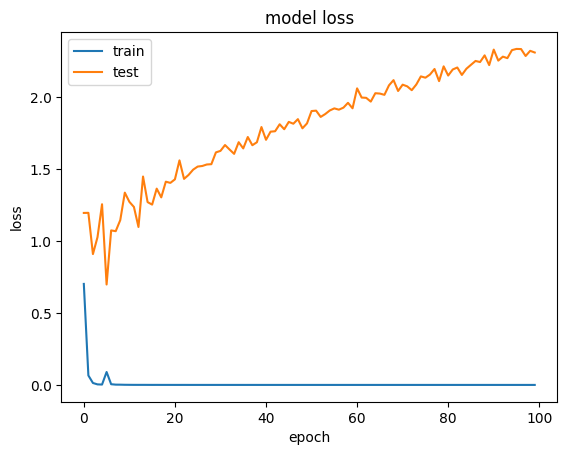

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Discussion on plots

Training Accuracy: The model quickly learns to correctly classify the training data. By the 4th epoch, it already reaches 100% accuracy, which it maintains throughout the rest of the training process. This might suggest overfitting, as the model seems to have perfectly learned the training set.

Validation Accuracy: This metric fluctuates but generally increases over time, peaking at about 85.39% on the 4th epoch. After the initial jump, however, the validation accuracy doesn't improve significantly, suggesting that the model might not be generalizing well to unseen data.

Training Loss: This metric, representing the model's error on the training data, decreases very quickly and reaches very low values.

Validation Loss: The validation loss, which represents the model's error on the validation data, generally increases over time. It suggests that the model's performance is deteriorating on unseen data even as it improves on the training data.